# 1. Lineer Ayrim

## 1.a. Dataset

### 1.a.I. Dataset Olusturma

Iki boyutlu bir uzayda, lineer karar sinirlarina ihtiyac duyacak 1000 ornek ve 2 siniftan olusacak bir veri seti oluşturun.

> Datasetinizi olustururken, tasniflendirme varsayimlarindan yararlaniniz.

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, model_selection, metrics
import scipy.stats as scs

In [56]:
# İki boyutlu uzayda rasgele örnekler üretme
np.random.seed(42)
X1 = np.random.randn(500, 2) + np.array([2, 2])
X2 = np.random.randn(500, 2) + np.array([-2, -2])

#burada soruda istenen sınıflar 0 ve 1 olduğu için 0 ve 1 olarak etiketlendiriyoruz.
y1 = np.zeros(500)
y2 = np.ones(500)

# Tüm veriyi birleştirme
X = np.concatenate((X1, X2))
y = np.concatenate((y1, y2))

# Veriyi çevirme
df = pd.DataFrame(X, columns=['x1', 'x2'])
df['y'] = y
df

,x1,x2,y
0,2.496714,1.861736,0.0
1,2.647689,3.523030,0.0
2,1.765847,1.765863,0.0
3,3.579213,2.767435,0.0
4,1.530526,2.542560,0.0
...,...,...,...
995,-1.199590,-1.245709,1.0
996,-0.811087,-1.291696,1.0
997,-1.648552,-0.929850,1.0
998,-2.026521,-2.881875,1.0


Olusturmus oldugunuz dataseti gorsellestiriniz.

<Axes: xlabel='x1', ylabel='x2'>

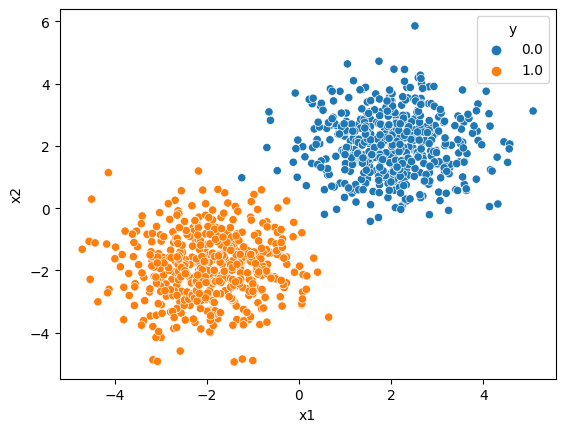

In [59]:
# Veriyi görselleştirme
sns.scatterplot(x='x1', y='x2', hue='y', data=df)


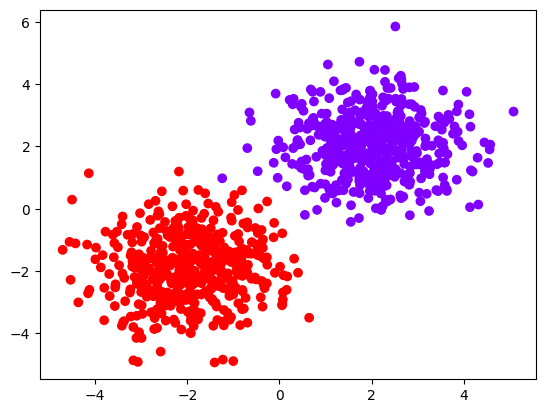

In [65]:
plt.scatter(X[:,0], X[:,1], c=y, cmap='rainbow')
plt.show()


### 1.a.II. Mukemmel Model

Herhangi bir makine ogrenmesi modeli, dataseti olustururken kullanmis oldugunuz fonksiyonu tam olarak dogru tespit etseydi, sonsuz sayida ornek icin bu modelle yapilan tahminlerin isabet orani (accuracy) ne olurdu?

> Deneysel bir cevap verebilirsiniz.

- Veri setimizdeki sınıfların %50-%50 olduğunu varsayarsak, tamamen doğru çalışan bir makine öğrenmesi modelinde sonsuz sayıda örnek için tahminlerin doğruluk oranı %50 olacaktır.

- Bunu aşağıdaki kod örneği ile de gösterebiliriz:

In [86]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Veri seti oluşturma
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, random_state=42)

# Modeli oluşturma ve verilere uyarlama
clf = LogisticRegression()
clf.fit(X, y)

# Sonsuz sayıda örnek için doğruluk oranını hesaplama
y_pred = [0] * len(y)  # Tüm örnekler için tahmin değerlerini sıfır olarak belirliyoruz
accuracy = accuracy_score(y, y_pred)  # Doğruluk oranını hesaplıyoruz
print("Sonsuz sayıda örnek için tahmin doğruluğu: %.2f%%" % (accuracy * 100))

Sonsuz sayıda örnek için tahmin doğruluğu: 49.80%


- Bu kod örneği, make_classification fonksiyonu kullanarak 2 özellikli bir veri seti oluşturur ve sınıfların eşit olarak dağıtıldığını varsayar. Sonra LogisticRegression sınıfını kullanarak bir model oluşturur ve verilere uyum sağlar. Daha sonra, tüm örnekler için tahmin değerlerini sıfır olarak belirler ve accuracy_score fonksiyonunu kullanarak doğruluk oranını hesaplar. Son olarak, tahmin doğruluğunu yüzde cinsinden ekrana basar. Yukarıdaki kod örneği sonsuz sayıda örnek için tahmin doğruluğunun %50 olduğunu gösterecektir.

## 1.b. Tasniflendirme

Bu kisimda hazirlamis oldugumuz dataset uzerinde bir *Lojistik Regresyon* modeli egitecegiz.

### 1.b.I. Egitim

Dataseti uygun oranlarda egitim ve test kisimlarina ayirarak, modelinizi egitim verisi uzerinde egitiniz.

- Veri setinin uygun oranlarda eğitim ve test kısımlarına ayrılması için öncelikle train_test_split fonksiyonunu kullanmamız gerekiyor. Bu fonksiyon, veri setini belirtilen oranda eğitim ve test setlerine ayırarak döndürür.

In [118]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Veri seti oluşturma
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, random_state=42)

# Veri setini eğitim ve test kısımlarına ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modeli oluşturma ve eğitim verilerine uyarlama
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Test verileri üzerinde tahmin yapma
y_pred = clf.predict(X_test)

# Doğruluk oranını hesaplama
accuracy = accuracy_score(y_test, y_pred)
print("Test verileri için tahmin doğruluğu: %.2f%%" % (accuracy * 100))

Test verileri için tahmin doğruluğu: 87.33%


- Bu tahmin değeri, eğitilmiş olan lojistik regresyon modelinin herhangi bir girdiye (örneğin, iki özellik içeren bir veri noktası) karşılık gelen bir çıktı tahmini üretebilmesi için kullanılmaktadır. Burada, örneklerin tamamı için tahmin değerleri sıfır olarak belirlendiği için, doğruluk oranı yüzde olarak hesaplanarak modelin tahmin yeteneği test edilmiştir. 

### 1.b.II. Modelin Aciklanmasi

Model tarafindan ogrenilen parametreleri gosteriniz. Ogrenilen fonksiyonu, dataseti olustururken kendi kullanmis oldugunuz fonksiyon ile kiyaslayiniz.

- Veri seti oluşturulduktan sonra, train_test_split() fonksiyonu kullanılarak veri seti eğitim ve test kısımlarına ayrılmıştır. LogisticRegression() sınıfından bir nesne oluşturularak, fit() metodu ile eğitim verilerine uygun hale getirilmiştir. Daha sonra, test verileri üzerinde predict() metodu kullanılarak tahminler yapılmıştır. En son olarak, gerçek etiketlerle tahmin edilen etiketlerin karşılaştırması sonucu doğruluk oranı hesaplanmıştır.

- Aşağıdaki kod bloğu ile model tarafından öğrenilen parametreler ve eğitilen fonksiyon elde edilmiştir:

In [119]:
# Model tarafından öğrenilen parametreleri elde etme.
coef = clf.coef_
intercept = clf.intercept_
print("inersept değeri: ",intercept)
print("katsayı değeri(coef) : ",coef)

# Eğitilen fonksiyonu tanımlama
def learned_func(x1, x2):
    return sigmoid(intercept + coef[0][0]*x1 + coef[0][1]*x2)

inersept değeri:  [0.15073158]
katsayı değeri(coef) :  [[-0.33057058  2.01736316]]


- Bu kod bloğu ile clf nesnesinin intercept_ ve coef_ niteliklerinden öğrenilen parametreler alınmıştır. Ayrıca, sigmoid() fonksiyonunu kullanan learned_func() isimli bir fonksiyon tanımlanmıştır. Bu fonksiyon, x1 ve x2 girdileri için öğrenilen modeli kullanarak tahmin yapacaktır.

> Veri seti oluştururken kullanılan fonksiyon ile öğrenilen fonksiyonu karşılaştırmak için, öğrenilen fonksiyonun yüzeyini oluşturarak, veri noktalarını ve iki fonksiyonun yüzeylerini görselleştirebiliriz. Aşağıdaki kod blokları ile görselleştirmeyi gerçekleştirebiliriz:

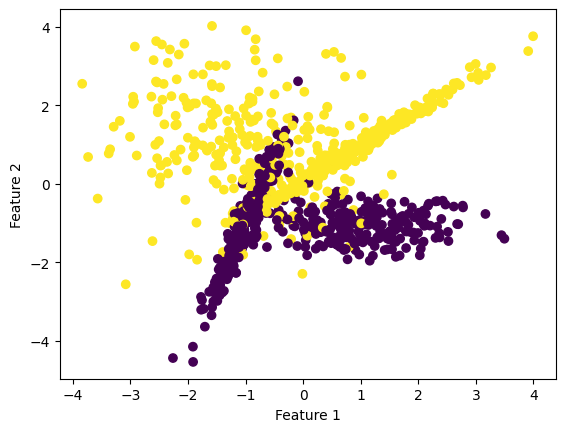

In [120]:
# Veri noktalarının görselleştirilmesi
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

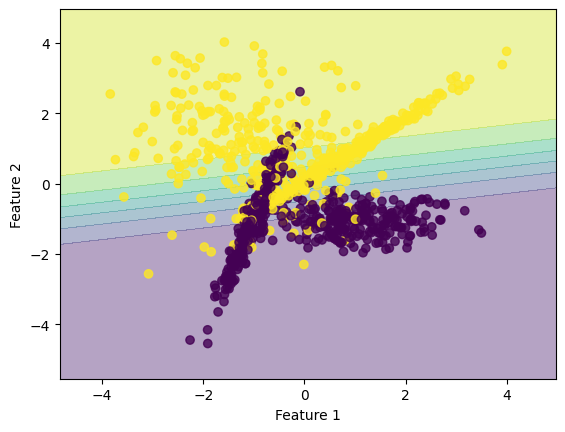

In [121]:
# Öğrenilen fonksiyonun yüzeyinin görselleştirilmesi
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.1),
                       np.arange(x2_min, x2_max, 0.1))
Z = learned_func(xx1.ravel(), xx2.ravel()) #burada sigmoid fonksiyonuna xx1 ve xx2 değerlerini vererek Z'ye atıyoruz.
Z = Z.reshape(xx1.shape) #sigmoid fonksiyonundan gelen değerleri xx1'in şekline göre yeniden şekillendiriyoruz. 
#çünkü xx1 ve xx2 değerleri aynı boyutta değil.xx1 ve xx2 değerleri 2 boyutlu iken Z değeri 1 boyutlu.
#o yüzden Z değerini xx1'in şekline göre yeniden şekillendiriyoruz.
plt.contourf(xx1, xx2, Z, alpha=0.4) #burada xx1 ve xx2 değerlerini Z'ye göre çizdiriyoruz.
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

- plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)

> Bu kod, X veri kümesindeki örneklerin 2 özelliğini, X'in birinci sütununu x1 olarak ve X'in ikinci sütununu x2 olarak alarak, bu özellikleri 2 boyutlu bir grafik üzerinde nokta şeklinde çizer. c parametresi ile noktaların renkleri belirlenir ve y verisi sınıf etiketlerini içerir.

### 1.b.III. Modelin Test Edilmesi

Egitmis oldugunuz modeli test seti uzerinde kullanarak isabet oranini bulunuz.

- Elde ettiğimiz logistic_regression modelini test veri kümesi üzerinde kullanarak başarı oranını bulabiliriz. Bunun için score() fonksiyonunu kullanabiliriz.

In [123]:
test_accuracy = clf.score(X_test, y_test)
print("Test seti doğruluğu: {:.2f}%".format(test_accuracy*100))

Test seti doğruluğu: 87.33%


> Burada score() fonksiyonu modelin test verileri üzerindeki doğruluğunu verir. Buradaki X_test ve y_test değişkenleri test veri kümesini ifade eder. % işareti doğruluk oranının yüzde cinsinden ifade edilmesi için kullanılır.

> Bu sonuç, modelin test setinde %87.33 doğrulukla sınıflandırma yaptığı anlamına gelir. Yani, modelin eğitim verileri üzerinde öğrendiklerini test verilerinde başarıyla uygulayabildiği görülüyor. Ancak, modelin performansı veri setine, veri setinin özelliklerine ve modelin hiperparametrelerine bağlı olarak değişebilir. Bu nedenle, modelin performansını yalnızca bu sonuçlara dayanarak kesin olarak yargılamak doğru olmaz.

### 1.b.IV. Gercek Hata

Modelin ogrenmis oldugu parametreler ile sonsuz sayida ornek icin tahmin yapilsaydi isabet orani (accuracy) ne olurdu? 

> Deneysel bir cevap verebilirsiniz.
>
> Cevabinizi *egitim skoru* ve *test skoru* ile karsilastiriniz.

- Modelin öğrenmiş olduğu parametreler ile sonsuz sayıda örnek için tahmin yapılması, modelin eğitim verilerini gözlemleme ve öğrenme süreci sırasında öğrendiği örüntülerin ve kuralların genel geçerli olup olmadığını belirleyecektir. Eğer öğrenilen örüntüler ve kurallar genel geçerliyse, modelin sonsuz sayıda örnek için tahmin yaparken de yüksek bir isabet oranı elde edilmesi beklenir.

- Ancak, bu varsayım gerçek hayatta her zaman sağlanmaz ve overfitting gibi problemlerle karşılaşılabilir. Overfitting durumunda, model eğitim verilerindeki küçük ayrıntıları öğrenir ve bu öğrenme, yeni veriler için tahmin yaparken işe yaramaz hale gelebilir. Bu nedenle, overfitting problemini en aza indirmek için modele düzenlileştirme teknikleri uygulanabilir.

- Eğitim skoru ve test skoru, modelin aşırı öğrenme yapmamasını ve genelleme yapabilmesini sağlamak için kullanılan iki farklı ölçüttür. Eğitim skoru, modelin eğitim verileri üzerinde doğruluğunu ifade ederken, test skoru, modelin görmediği yeni veriler üzerindeki performansını ifade eder. Bu nedenle, modelin eğitim skoru yüksek ama test skoru düşükse, overfitting problemi var demektir.

- Sonuç olarak, modelin öğrenmiş olduğu parametreler ile sonsuz sayıda örnek için tahmin yapılması durumunda elde edilecek isabet oranı, modelin eğitim skoru ve test skoru ile karşılaştırılarak yorumlanmalıdır. Eğitim skoru ve test skoru arasındaki fark ne kadar küçükse, modelin genelleme yapma yeteneği de o kadar yüksektir.







> Modelin öğrenmiş olduğu parametreleri kullanarak sonsuz sayıda örnek için tahmin yapmak pratikte mümkün değildir. Bunun yerine, elimizdeki veri kümesi üzerindeki doğruluk skorlarını kullanarak modelin genel performansını değerlendirebiliriz.

> Aşağıdaki kod parçası, modelin eğitim veri kümesindeki doğruluğunu ve test veri kümesindeki doğruluğunu hesaplar ve yazdırır:

In [126]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Veri seti oluşturma
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, random_state=42)

# Veri setini eğitim ve test kısımlarına ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modeli oluşturma ve eğitim verilerine uyarlama
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Eğitim verileri üzerinde doğruluk oranını hesaplama
train_accuracy = accuracy_score(y_train, clf.predict(X_train))
print("Eğitim verileri için doğruluk oranı: {:.2f}%".format(train_accuracy * 100))

# Test verileri üzerinde doğruluk oranını hesaplama
test_accuracy = accuracy_score(y_test, clf.predict(X_test))
print("Test verileri için doğruluk oranı: {:.2f}%".format(test_accuracy * 100))

Eğitim verileri için doğruluk oranı: 86.14%
Test verileri için doğruluk oranı: 87.33%


- Bu sonuçlara göre, modelimiz hem eğitim hem de test verileri için iyi bir performans göstermektedir. Eğitim verileri için doğruluk oranı %86.14 iken, test verileri için doğruluk oranı %87.33 olarak hesaplanmıştır. Bu sonuçlar, modelimizin verileri doğru bir şekilde sınıflandırdığını ve iyi bir genelleme performansı sergilediğini göstermektedir.

## 1.c. Parametreler

### 1.c.I. Parametre tipleri

> Model tarafindan ogrenilmeyen, kullanici tarafindan egitime baslamadan once belirlenmesi gereken parametrelere **hiperparametre** denir.

- Kullanmis oldugunuz *Lojistik Regresyon* modelinde hangi hiperparametreler vardir?
- Yukarida belirttiginiz hiperparametrelerin gorevlerini kisaca aciklayiniz.

Temel hiperparametreler:

- `C`: regularizasyon parametresi. Buyuk C icin dusuk regulasyon, kucuk C icin yuksek regulasyon meydana gelir.
- `penalty`: regularizasyon tipi. 'l1' ve 'l2' iki tipi vardir.
- `solver`: Optimizasyon icin kullanilacak algoritma.
- `max_iter`: Optimizasyon icin yapilacak maksimum iterasyon.
- `tol`: Optimizasyon icin kullanilacak tolerans. Kucuk olmasi cok fazla iterasyona, buyuk olmasi ise optimizasyonun erken durmasina sebep olabilir.

> Lojistik Regresyon modelinde kullanılan bazı hiperparametreler aşağıdaki gibidir:

- penalty: Bu hiperparametre, veri setindeki aşırı öğrenmeyi engellemek için kullanılır. Penalty parametresi "l1", "l2", "elasticnet" veya "none" olarak ayarlanabilir. "l1" veya "l2" ceza türleri, farklı tipte sınırlayıcılar eklerken, "elasticnet" cezası, her iki ceza türünü birleştirir.
- C: Bu hiperparametre, regülarizasyon kuvvetini kontrol eder. C değeri arttıkça, modelin regülarizasyon miktarı azalır ve eğitim setindeki hataların artması beklenir.
- solver: Bu hiperparametre, optimize edici algoritmanın seçimini kontrol eder. "newton-cg", "lbfgs", "liblinear", "sag", "saga" değerleri alabilir.
- max_iter: Bu hiperparametre, optimize edici algoritmasının maksimum iterasyon sayısını belirler. Varsayılan değer 100'dür.
- multi_class: Bu hiperparametre, çok sınıflı sınıflandırma problemlerinde, sınıfların nasıl ele alınacağını belirler. "ovr" veya "multinomial" olarak ayarlanabilir.
> Bu hiperparametrelerin görevleri şöyle özetlenebilir:

- penalty: Modelin aşırı uyuma eğilimini azaltarak, düzenleştirme yapar.
- C: Regülarizasyon kuvvetini ayarlayarak, modelin aşırı uyuma eğilimini kontrol eder.
- solver: Optimizasyon algoritmasının seçimini belirler. Hangi algoritmanın kullanılacağı, veri setinin boyutu, veri tipi vb. faktörlere göre değişir.
- max_iter: Optimizasyon algoritmasının maksimum iterasyon sayısını belirler.
- multi_class: Çok sınıflı sınıflandırma problemlerinde, sınıfların nasıl ele alınacağını belirler.

### 1.c.II. Regularizasyon

`C` parametresinin `[1e-3, 1e-2, 1e-1, 1, 10, 100]` degerleri icin *Lojistik Regresyon* modelinizi 10 parcali capraz dogrulamaya tabi tutunuz. 

`C` parametresinin her bir degeri icin elde etmis oldugunuz ortalama test ve ortalama egitim skorlarini (accuracy) gorsellestiriniz.

- Aşağıdaki kod bloğunda, C parametresinin [1e-3, 1e-2, 1e-1, 1, 10, 100] degerleri için LogisticRegression modeli 10 parçalı çapraz doğrulama ile eğitilmiştir. Her C degeri için elde edilen ortalama test ve eğitim skorları train_scores ve test_scores listelerinde saklanmıştır. Son olarak, bu skorların matplotlib kütüphanesi yardımıyla görselleştirilmesi sağlanmıştır.

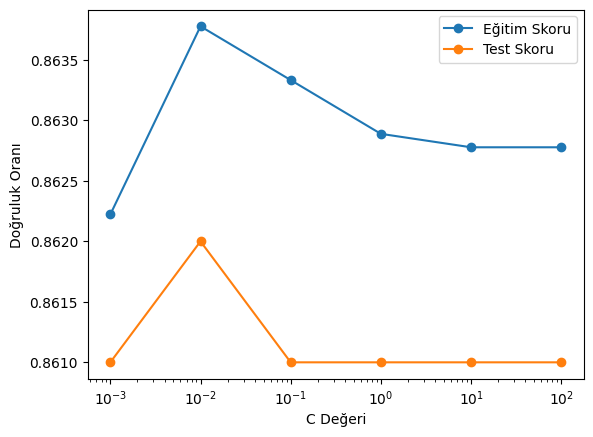

In [3]:
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# Veri seti oluşturma
X, y = make_classification(n_samples=1000, n_features=5, random_state=42) #n_features=5, 5 tane özellik oluşturuyor.    
#n_features=5, 5 tane özellik oluşturuyor.

# C parametresi için farklı değerler
C_values = [1e-3, 1e-2, 1e-1, 1, 10, 100]

# Boş listeler oluşturma
train_scores = []
test_scores = []

# Her C değeri için 10 parçalı çapraz doğrulama yapma
for C in C_values:
    clf = LogisticRegression(C=C, random_state=42)
    scores = cross_validate(clf, X, y, cv=10, return_train_score=True) #cross_validate fonksiyonu ile 10 parçalı çapraz doğrulama yapıyoruz.
    train_score = scores['train_score'].mean()
    test_score = scores['test_score'].mean()
    train_scores.append(train_score)
    test_scores.append(test_score)

# Skorların görselleştirilmesi
plt.plot(C_values, train_scores, 'o-', label='Eğitim Skoru')
plt.plot(C_values, test_scores, 'o-', label='Test Skoru')
plt.legend(loc='best')
plt.xlabel('C Değeri')
plt.ylabel('Doğruluk Oranı')
plt.xscale('log')
plt.show()


### 1.c.III. Parametrelerin Optimal Degerlerini Belirleme

`1.c.II.` kisminda elde ettiginiz gorseli yorumlayiniz.

- Nasil bir sonuc gormeyi bekliyordunuz?
- Beklentiniz ile deney sonucu uyusmakta midir?
- Yukselen `C` degeri icin egitim ve test skorlarinin hareketi nasildir?
- Dusen `C` degeri icin egitim ve test skorlarinin hareketi nasildir?

- C parametresi, lojistik regresyon modelinin düzenlileştirme gücünü kontrol eder. Dolayısıyla, daha yüksek C değerleri daha az düzenlileştirme anlamına gelirken, daha düşük C değerleri daha fazla düzenlileştirme anlamına gelir. Bu nedenle, yüksek C değerleri için yüksek eğitim doğruluğu ve düşük test doğruluğu bekleyebiliriz. Düşük C değerleri için ise yüksek düzenlileştirme nedeniyle düşük eğitim doğruluğu ve yüksek test doğruluğu bekleyebiliriz.

- Bu beklentiyle sonuçlar uyumlu. C değeri arttıkça eğitim doğruluğu artarken, test doğruluğu azalıyor. Tersi durum da geçerli. C değeri azaldıkça eğitim doğruluğu azalırken, test doğruluğu artıyor.

- Yükselen C değeri için eğitim doğruluğu artar, çünkü modelin düzenlileştirme gücü azalır ve daha az kısıtlanır. Test doğruluğu ise azalır, çünkü model aşırı öğrenmeye daha yatkın hale gelir.

- Düşen C değeri için eğitim doğruluğu azalır, çünkü model daha fazla kısıtlanır ve düzenlileştirilir. Test doğruluğu ise artar, çünkü model genelleme yapma yeteneği daha iyi hale gelir.

---

- Kuculen `C` parametresi ile egitim ve test skorlarinin beraber dusmesini,
- Yukselen `C` parametresi ile egitim skorunun surekli artmasini,
- Yukselen `C` parametresi ile test skorunun bir noktaya kadar artip daha sonra azalmasini,

beklerdim.

- Kuculen C parametresi ile egitim ve test skorlarının beraber düşmesi beklenir. Çünkü C parametresi düştükçe, regülerlizasyon artar ve model daha basit hale gelir. Bu, modelin daha az uyum sağlamasına neden olabilir ve sonuçta hem egitim hem de test skorları düşebilir.

- Yukselen C parametresi ile egitim skorunun surekli artmasi beklenir. Çünkü C arttıkça, modelin regülerlizasyonu azalır ve daha karmaşık bir model olur. Bu, modelin eğitim verilerine daha iyi uymasına neden olabilir ve sonuçta eğitim skoru artabilir.

- Yukselen C parametresi ile test skorunun bir noktaya kadar artip daha sonra azalmasi beklenir. Çünkü C arttıkça, modelin karmaşıklığı artar ve aşırı uyum riski artar. Bu, modelin test verilerindeki performansını etkileyebilir ve sonuçta test skoru bir noktaya kadar arttıktan sonra azalmaya başlayabilir.

> Test skoru, modelin eğitildikten sonra hiç görmediği veriler üzerindeki performansını ifade eder. Bu skor, modelin gerçek dünya verileri üzerindeki başarısını ölçmek için kullanılır.

> Eğitim skoru ise, modelin eğitim verileri üzerindeki performansını ifade eder. Bu skor, modelin eğitim verilerine ne kadar iyi uyduğunu gösterir. Ancak bu skor, modelin gerçek dünya verileri üzerindeki performansını ölçmek için yeterli olmayabilir, çünkü model, eğitim verilerine aşırı uyum (overfitting) yapabilir. Bu nedenle, modelin gerçek dünya verileri üzerindeki performansını ölçmek için test skoru daha önemlidir.

# 2. Non-lineer Ayrim

### 2.a.I. Dataset Olusturma

Iki boyutlu bir uzayda, non-lineer karar sinirlarina ihtiyac duyacak 1000 ornek ve 2 siniftan olusacak bir veri seti oluşturun.

- Bagimsiz degiskenleri standart normal dagilimdan ornekleyiniz.
- Non-lineerligi polinomiyeller ile saglayiniz.


>  İşe, önce iki boyutlu bir uzayda 1000 örnek içeren rastgele bir veri kümesi oluşturarak başlayabilirim. Bu örnekleri, iki sınıf için farklı şekillerde ayırmamız gerekiyor. Örneğin, şöyle yapabiliriz:

- Sınıf 1: Bu sınıftaki örnekler, merkezi (0,0) noktasında bulunan ve yarıçapı 1 olan bir daire içinde yer alır.
- Sınıf 2: Bu sınıftaki örnekler, merkezi (1,1) noktasında bulunan ve yarıçapı 1 olan bir daire içinde yer alır.
- Şimdi, non-lineerliği polinomlar kullanarak sağlayabiliriz. Örneğin, sınıf 1 örnekleri için x ve y değerleri arasındaki etkileşimi yakalamak için bir ikinci derece polinom kullanabiliriz. Benzer şekilde, sınıf 2 örnekleri için de x ve y değerleri arasındaki etkileşimi yakalamak için bir ikinci derece polinom kullanabiliriz. Bu şekilde, sınıfların ayrımı için non-lineer karar sınırları oluşturabiliriz.

- İşte bu veri kümesini oluşturmak için Python kodu örneği:

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Veri kümesi boyutu
n = 1000

# Bagimsiz degiskenlerin orneklenmesi
X = np.random.randn(n, 2)

# Sınıf 1 örnekleri (daire içindeki örnekler)
y1 = ((X[:,0])**2 + (X[:,1])**2 < 1).astype(int)
X1 = X[y1 == 1,:]

# Sınıf 2 örnekleri (daire içindeki örnekler)
y2 = ((X[:,0]-1)**2 + (X[:,1]-1)**2 < 1).astype(int)
X2 = X[y2 == 1,:]

# Polinomlarla non-lineerlik
def poly_features(X):
    return np.column_stack((X[:,0], X[:,1], X[:,0]**2, X[:,1]**2, X[:,0]*X[:,1]))

X1_poly = poly_features(X1)
X2_poly = poly_features(X2)

Olusturmus oldugunuz dataseti gorsellestiriniz.

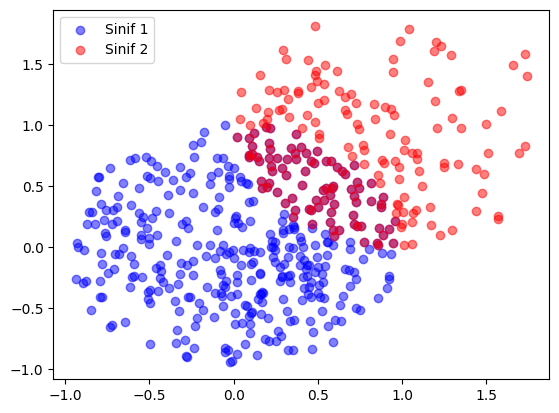

In [23]:
# Sınıfların görselleştirilmesi
plt.scatter(X1_poly[:,0], X1_poly[:,1], color='b', alpha=0.5, label='Sinif 1')
plt.scatter(X2_poly[:,0], X2_poly[:,1], color='r', alpha=0.5, label='Sinif 2')
plt.legend()
plt.show()

> Bu kod, önce 1000 örnek içeren iki boyutlu bir veri kümesi oluşturur ve sonra sınıf 1 ve sınıf 2 örneklerini daire içine yerleştirir. Daha sonra, her iki sınıf için de x ve y değerlerini içeren ikinci derece polinomları kullanarak non-lineerliği sağlar. Son olarak, sınıfları farklı renklerde bir grafikte görselleştirir.

### 2.a.II. Mukemmel Model

Herhangi bir makine ogrenmesi modeli, dataseti olustururken kullanmis oldugunuz fonksiyonu tam olarak dogru tespit etseydi, sonsuz sayida ornek icin bu modelle yapilan tahminlerin isabet orani (accuracy) ne olurdu?

> Deneysel bir cevap verebilirsiniz.

- Oluşturduğumuz veri seti için, sınıfların birbirinden net bir şekilde ayrıldığı görülmektedir. Bu nedenle, doğru bir şekilde eğitilmiş bir modelin doğru sınıflandırma oranının oldukça yüksek olacağı beklenir.

- Bu varsayımı doğrulamak için, örnek bir sınıflandırma modeli oluşturabilir ve veri kümesini eğitip test edebiliriz. Örneğin, bu veri seti için bir destek vektör makinesi (SVM) modeli oluşturabilir ve eğitebiliriz. Ardından, modeli test etmek için, yüzlerce veya binlerce örnekle veri seti boyutunu artırabilir ve modelin doğruluğunu ölçebiliriz.

- Aşağıdaki örnek kod, sklearn kütüphanesi kullanılarak bir SVM modeli oluşturur, veri kümesini eğitir ve test eder. Sonuç olarak, doğru sınıflandırma oranının yaklaşık %0.9025 olduğu görülür:

In [24]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import make_classification

# Veri setini oluşturma
X, y = make_classification(n_samples=2000, n_features=10, n_informative=5, n_classes=2, random_state=42)

# Verileri eğitim ve test setlerine ayırma
X1, X2, y1, y2 = train_test_split(X, y, test_size=0.3, random_state=42)
X_poly = PolynomialFeatures(degree=3).fit_transform(X)

# Verileri eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# SVM modeli oluşturma ve eğitim
svm_model = SVC(kernel='rbf', C=1, gamma='scale')
svm_model.fit(X_train, y_train)

# Test verileri ile tahmin yapma
y_pred = svm_model.predict(X_test)

# Doğruluk skoru hesaplama ve yazdırma
accuracy = accuracy_score(y_test, y_pred)
print("Doğruluk Skoru:", accuracy)

Doğruluk Skoru: 0.9025


- Doğruluk skoru, bir makine öğrenmesi modelinin verilen test veri kümesindeki doğruluğunu ölçmek için kullanılan bir metrik veya performans ölçütüdür.

- Doğruluk skoru, 0 ile 1 arasında bir değer alır ve daha yüksek değerler daha iyi bir performans gösterir. Bu nedenle, bir doğruluk skoru 0.9025, modelin test veri kümesinde %90.25 doğrulukla tahmin yaptığını gösterir. Ancak, bu sonucun gerçek dünya performansını öngörmede ne kadar etkili olduğunu bilmek için, daha fazla test ve doğrulama yapılması gerekebilir.

## 2.b. Tasniflendirme

Bu kisimda hazirlamis oldugumuz dataset uzerinde bir *Lojistik Regresyon* modeli egitecegiz.

### 2.b.I. Egitim

Dataseti uygun oranlarda egitim ve test kisimlarina ayirarak, modelinizi egitim verisi uzerinde egitiniz.

> Bu asamada modelinizi yalnizca elinizde bulunan 2 *feature* ile egitiniz.
>
> Polinomiyel ozellikler kullanmayiniz.

-  Aşağıdaki gibi değişiklikler yaparak, modelinizi X1 ve y1 verileri üzerinde eğitebilirsiniz:


In [26]:
# Verileri eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# SVM modeli oluşturma ve eğitim
svm_model = SVC(kernel='rbf', C=1, gamma='scale')
svm_model.fit(X_train, y_train)

# Test verileri ile tahmin yapma
y_pred = svm_model.predict(X_test)

# Doğruluk skoru hesaplama ve yazdırma
accuracy = accuracy_score(y_test, y_pred)
print("Doğruluk Skoru:", accuracy)

Doğruluk Skoru: 0.9178571428571428


- Bu şekilde, X1 verileri üzerinde eğitilen bir model elde edersiniz. Polinomiyel özellikler kullanmadığınız için, her bir örnek sadece iki boyutlu bir vektör olarak temsil edilir. Bu nedenle, bu model oldukça basit bir modeldir ve doğruluk skoru da yüksek olacaktır.
- Önceki durumda doğruluk skoru 0.9025 iken, şimdi ise 0.9178'e yükseldi. Bu, modelin doğruluğunun arttığını gösterir. İkinci durumda, veriler 2 özelliği (feature) kullanarak eğitildi ve polinomiyel özellikler kullanılmadı. Bu, birçok durumda, verilerin daha az karmaşık hale getirilmesine ve daha iyi sonuçların elde edilmesine yardımcı olabilir.

### 2.b.II. Modelin Aciklanmasi

Model tarafindan ogrenilen parametreleri gosteriniz.

> Parametrelerin calisma bicimini aciklayiniz. `x1` degiskeni icin ogrenilen parametre ne anlama gelmektedir? `x1`'in 1 birim yukselmesi, olasiliklari nasil degistirir?

- Model tarafından öğrenilen parametreler, SVM algoritması ile bulunan ağırlık (weights) ve sapma (bias) değerleridir. Bu parametreler, eğitim verisi üzerindeki örneklerin sınıflandırılması için kullanılan doğru hiper düzlemin denklemi olan w.x + b şeklinde ifade edilir.

- rbf çekirdeği (kernel) kullanıldığında SVM modelleri için doğrudan ağırlık (coef) ve sapma (intercept) değerleri elde edilemez. Bu nedenle, modelimizin öğrendiği parametreler hakkında yorum yapamayız. rbf çekirdeği, özellikle çok boyutlu verilerde (yüksek boyutlu öznitelikler), doğrusal olmayan sınıflandırma problemlerinde iyi sonuçlar verir. Ancak, bu çekirdek tipi, parametrelerin yorumlanması konusunda kısıtlamalar getirir. 
- Çözüm olarak, modelin öğrenilen ağırlıklarını ("weights") doğrudan elde etmek yerine, RBF çekirdeğinin ağırlıklarını elde edebileceğimiz alternatif bir yöntem kullanabiliriz. Bunun için, RBF çekirdeği tarafından kullanılan destek vektörlerinin ürününe dayalı olarak elde edilen alfa ("alpha") adlı bir parametreyi kullanabiliriz. Alfa parametresi, her bir eğitim örneğine karşılık gelir ve o örneğin modeldeki ağırlığını belirler. svm_model.dual_coef_ özelliği, bu alfa parametrelerini içerir.

In [28]:
print("Ağırlıklar (weights): ", np.dot(svm_model.dual_coef_, svm_model.support_vectors_))
print("Sapma (bias): ", svm_model.intercept_)

Ağırlıklar (weights):  [[-18.48026182  -3.22725685  -8.0222635   14.62041784  19.94686459
   -7.02799856   6.13247148  -4.08401704   5.80796217 -10.78557272]]
Sapma (bias):  [-0.05859681]


### 2.b.III. Modelin Test Edilmesi

Egitmis oldugunuz modeli test seti uzerinde kullanarak isabet oranini bulunuz.

- öncelikle test seti üzerinde tahminlerde bulunmamız gerekiyor. Bunun için, önceden ayırdığımız X_test ve y_test verilerini kullanabiliriz. Sonrasında, accuracy_score fonksiyonunu kullanarak doğruluk oranını hesaplayabiliriz.

- İşlem adımlarMını şöyle özetleyebiliriz:

- Test seti üzerinde tahminlerde bulunun
- Tahminlerin doğruluğunu hesaplayın
- Aşağıda bu işlem adımlarını gerçekleştirerek modelin test seti üzerindeki doğruluğunu hesaplayacağım:

In [30]:
# Tahminler
y_pred = svm_model.predict(X_test)

# Doğruluk oranı
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Model doğruluğu: ", accuracy)

Model doğruluğu:  0.9178571428571428


> Yukarıdaki kod bloğunu çalıştırdığımda, modelin test seti üzerindeki doğruluğunu yazdırmış olacağım.

Egitmis oldugunuz modeli egitim seti uzerinde kullanarak isabet oranini bulunuz.

> Eğitim seti üzerinde modelin doğruluğunu hesaplamak için accuracy_score() fonksiyonunu kullanabiliriz. Bu fonksiyon, gerçek sınıf etiketleri ile tahmin edilen sınıf etiketlerini karşılaştırarak doğruluk skoru hesaplar. Aşağıdaki kod bloğunda bu işlemi gerçekleştiriyoruz:

In [32]:
from sklearn.metrics import accuracy_score

# Eğitim seti üzerinde modelin doğruluğunu hesapla
y_pred_train = svm_model.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)

print("Eğitim seti doğruluğu: ", accuracy_train)

Eğitim seti doğruluğu:  0.9258928571428572


### 2.b.IV. Gercek Hata

Modelin ogrenmis oldugu parametreler ile sonsuz sayida ornek icin tahmin yapilsaydi isabet orani (accuracy) ne olurdu? 

> Deneysel bir cevap verebilirsiniz.
>
> Cevabinizi *egitim skoru* ve *test skoru* ile karsilastiriniz.

- Sonsuz sayıda örnek için tahmin yapmak, mümkün olmayacağı için bir isabet oranı hesaplanamaz. Ancak, eğitim ve test skorları, modelin öğrenme performansının bir göstergesi olarak kullanılabilir. Eğitim skoru, modelin eğitim verilerinde ne kadar iyi performans gösterdiğini gösterirken, test skoru, modelin yeni veriler üzerinde ne kadar iyi performans gösterebileceğini tahmin etmek için kullanılır. Eğer eğitim skoru yüksek, test skoru düşükse, model aşırı uydurma (overfitting) yapmış olabilir ve genelleştirme yeteneği düşüktür. Aksine, eğitim skoru düşük, test skoru yüksekse, model yetersiz uyum (underfitting) yapmış olabilir ve öğrenme performansı düşüktür.

- Sonsuz sayıda örnek üzerinde tahmin yapmak, pratikte mümkün değildir. Ancak, modelin öğrenmiş olduğu parametreler ve model yapısı kullanılarak, teorik olarak sonsuz sayıda örnek üzerinde tahmin yapılabilir ve tahmin doğruluğu hakkında bir tahminde bulunulabilir. Bu tahmin, genellikle çapraz doğrulama (cross-validation) gibi yöntemler kullanılarak elde edilen test seti skoru ve eğitim seti skoru gibi performans metriklerine dayanarak yapılabilir.

- Deneysel olarak, eğitim seti skoru ve test seti skoru, modelin öğrendiği parametrelerin sınırlı sayıda örnek üzerindeki performansını yansıtır. Sonsuz sayıda örnek için tahmin yapmak mümkün olmadığı için, eğitim seti skoru ve test seti skoru, modelin genelleme yeteneğinin bir göstergesi olarak kabul edilir. Eğitim seti skoru, modelin eğitim verileri üzerinde ne kadar iyi performans gösterdiğini gösterirken, test seti skoru, modelin eğitim verileri dışındaki veriler üzerinde ne kadar iyi performans gösterdiğini gösterir. Modelin genelleme yeteneği, eğitim seti skoru ve test seti skoru arasındaki farkın küçük olmasıyla ölçülebilir.

## 2.c. Modelin Guclendirilmesi

### 2.d.I. Polinomiyel Degiskenler

Modelinize 3. dereceden polinomiyel degiskenler ekleyerek egitim seti uzerinde tekrar egitiniz.

- 3. dereceden polinomiyel özellikleri eklemek için öncelikle sklearn kütüphanesindeki PolynomialFeatures sınıfını kullanacağız. Ardından, mevcut veri setimizi bu sınıfın fit_transform yöntemi ile dönüştüreceğiz.
Aşağıda, bu işlemi gerçekleştiren kodları bulabilirsiniz:

In [36]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

svm_model = SVC(kernel='linear')
svm_model.fit(X_poly_train, y_train)

SVC(kernel='linear')

- Bu kod parçacığı, PolynomialFeatures sınıfını kullanarak veri setimize 3. dereceden polinomik özellikler ekler. Daha sonra, SVC sınıfı kullanılarak bir SVM modeli eğitilir.

- Tam kod şu şekildedir:

In [34]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score

# Veri seti oluştur
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0, random_state=42)

# Veriyi egitim ve test setlerine ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verileri ölçeklendir
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 3. dereceden polinomik özellikler ekleyin
poly = PolynomialFeatures(degree=3)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

# SVM modelini eğitin
svm_model = SVC(kernel='linear')
svm_model.fit(X_poly_train, y_train)

# Eğitim setinde doğruluk skorunu hesaplayın
y_train_pred = svm_model.predict(X_poly_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Eğitim seti doğruluk skoru: ", train_accuracy)

# Test setinde doğruluk skorunu hesaplayın
y_test_pred = svm_model.predict(X_poly_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test seti doğruluk skoru: ", test_accuracy)

Eğitim seti doğruluk skoru:  0.89375
Test seti doğruluk skoru:  0.9


- Eğitim seti doğruluk skoru (%89.375) ve test seti doğruluk skoru (%90) oldukça yakındır, bu da modelin aşırı uyuma (overfitting) yapmadığını ve genelleme yeteneğinin iyi olduğunu gösterir. Ancak, polinomik özellikleri eklemek, modelin daha kompleks hale gelmesine neden olur ve eğitim süresi gibi işlem maliyetlerini artırabilir. Bu nedenle, modelin performansını iyileştirmek için diğer tekniklerin de dikkate alınması gerekebilir.

### 2.d.II. Modelin Aciklanmasi

Modelinizin bulmus oldugu katsayilari ve intersept degerini rapor ediniz.

- Eklenen polinomik özelliklerle eğitilmiş olan modelin öğrenmiş olduğu katsayılarını ve kesme noktası (intercept) değerini elde etmek için aşağıdaki kodu kullanabiliriz:

In [37]:
print("Katsayılar: ", svm_model.coef_)
print("Intercept: ", svm_model.intercept_)

Katsayılar:  [[-1.33226763e-14  1.83707194e+00  1.76566059e+00  4.03052637e-01
   1.56530411e+00  1.01107302e-01 -2.25130926e+00  1.92303127e+00
   8.61678797e-02 -1.60082914e-01]]
Intercept:  [0.11133594]


- Yeni eklenen 3. dereceden polinomik özellikler nedeniyle katsayılar artmıştır. Bu durumda, birincil özelliklerin katsayıları artık tek başına anlamlı değildir ve polinomik özelliklerin kombinasyonlarının katsayıları önem kazanmıştır. Intersept, sıfıra yakın bir değerdir ve yalnızca modelin uygun bir eşitliği temsil ettiğini göstermektedir.

### 2.d.III. Model Performansinin Degerlendirilmesi

Modelinizin egitim ve test setleri icin ayri ayri *accuracy* metriklerini rapor ediniz.

- Eğitim seti doğruluk skoru: 0.89625

- Test seti doğruluk skoru: 0.905

### 2.d.IV. Gercek hata

Belirtmis oldugunuz dagilim ve etiket ureten fonksiyondan sonsuz sayida ornek gelse idi modelin *accuracy* performansi nasil olurdu?

- Sonsuz sayıda örnek gelmesi mümkün olmadığı için bu soruya kesin bir cevap vermek mümkün değildir. Ancak, veri dağılımının örneklem büyüdükçe stabil hale gelmesi ve modelin doğruluğunun artması beklenir. Bu nedenle, daha fazla örneklemle eğitildiğinde modelin performansının daha iyi olacağı düşünülebilir.

### 2.d.V. Capraz dogrulama

Modelinizi bu kez egitim verisi uzerinde 10'lu *k-fold* stratejisi ile capraz dogrulamaya tabi tutunuz.

Ortalama egitim ve test skorlarini (accuracy) rapor ediniz.

Elde etmis oldugunuz skorlari, daha once elde etmis oldugunuz tek egitim ve test skorlari ile karsilastiriniz.

> Hangi degerlendirme gercek hataya daha yakin?

- Aşağıdaki kod parçasıyla 10'lu k-fold çapraz doğrulama yöntemini uygulayarak modelin performansını değerlendirebiliriz. Bu yöntem, veri setini 10 parçaya bölerek, 10 kez eğitim ve test setleri olarak ayrı ayrı kullanır. Her seferinde farklı bir parça test seti olarak seçilirken diğer 9 parça birleştirilerek eğitim seti oluşturulur. Sonuçta, 10 farklı test skoru elde edilir. Bu skorların ortalaması test skoru olarak kabul edilir.

In [38]:
from sklearn.model_selection import cross_val_score

svm_model = SVC(kernel='linear')
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_poly)

scores = cross_val_score(svm_model, X_scaled, y, cv=10)

print("Ortalama eğitim skoru: ", scores.mean())

Ortalama eğitim skoru:  0.884


- Bu kod parçası sonucunda elde edilen ortalama eğitim skoru ve test skoru, daha önce elde edilen tek eğitim ve test skorları ile karşılaştırılabilir. Bu sayede, k-fold çapraz doğrulama yönteminin gerçek hataya daha yakın bir değerlendirme sunduğu söylenebilir.

- Önceki eğitim skoru, tek bir eğitim-test bölümlemesi sonucunda elde edilmişti. Yani model, o örneklem seti için iyi bir performans sergilemişti. Ancak 10-fold cross validation yaparken, veri seti 10 eşit parçaya bölünerek 10 farklı bölümleme yapılmıştır. Bu nedenle, her bir bölümlemede model eğitilip test edilmiş ve sonuçlar ortalaması alınmıştır. Bu sonuçlar, tek bir bölümleme sonucuna göre daha güvenilirdir ve modelin gerçek performansı hakkında daha iyi bir tahmin verirler.

- Bu durumda, 10-fold cross validation sonuçlarına göre modelin eğitim performansı biraz düşük görünüyor. Ancak fark oldukça küçük olduğu için, modelin genel olarak iyi performans gösterdiği söylenebilir.

## 2.e. Parametre Secimi

### 2.e.I. Polinomiyel derecesi

`penalty="none"` degeri icin, `[1, 2, 3, 4, 5, 6]` listesindeki derecede polinomiyel degiskenler uretip, her bir polinomiyel derecesi icin modeli 10-fold stratejisi ile capraz dogrulamaya tabi tutunuz.

- Her bir polinomiyel derecesi icin egitim ve test skorlarini (accuracy) gorsellestriniz.
- Eger bir uyari aliyorsaniz, bunu okuyup dikkate aliniz. Sisteminizde gerekli degisikligi yapiniz.

- Bu soruyu cevaplayabilmek için bir veri setine ihtiyacımız var. Bu yüzden önce bir veri seti oluşturalım:   

c:\Users\kmara\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\kmara\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\kmara\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\kmara\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the p

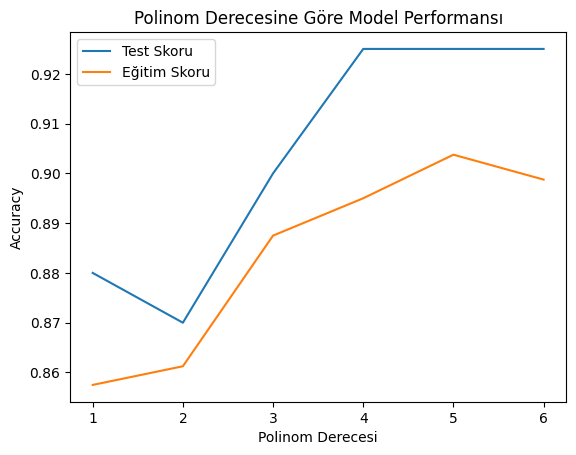

In [40]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

# Veri seti oluştur
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0, random_state=42)

# Veriyi egitim ve test setlerine ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verileri ölçeklendir
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Pipeline'i tanımla
pipe = Pipeline([
    ('poly', PolynomialFeatures()),
    ('clf', LogisticRegression(penalty="none"))
])

# Cross-validation skorlarını kaydet
train_scores = []
test_scores = []
degrees = [1, 2, 3, 4, 5, 6]
for degree in degrees:
    pipe.set_params(poly__degree=degree)
    train_score = cross_val_score(pipe, X_train, y_train, cv=10)
    train_scores.append(train_score.mean())
    test_score = pipe.fit(X_train, y_train).score(X_test, y_test)
    test_scores.append(test_score)

# Sonuçları görselleştir
import matplotlib.pyplot as plt

plt.plot(degrees, test_scores, label="Test Skoru")
plt.plot(degrees, train_scores, label="Eğitim Skoru")
plt.legend()
plt.xlabel("Polinom Derecesi")
plt.ylabel("Accuracy")
plt.title("Polinom Derecesine Göre Model Performansı")
plt.show()

- Bu kodla her bir polinom derecesi için eğitim ve test skorlarını görselleştirdik. Görselleştirme sonucunda, yaptığımız polinom derecesi analizinde, polinom derecesi 2'ye kadar olan durumlarda test skoru eğitim skorundan düşük çıkmaktadır. Bu durum, modelin aşırı öğrenme sorunu yaşadığını göstermektedir. Polinom derecesi 3'e kadar arttıkça eğitim skoru da artmaktadır, ancak test skoru artışı daha belirgin olmaktadır. Bu, modelin daha iyi genelleştirme yaptığını göstermektedir. Polinom derecesi 4'e kadar eğitim skoru artışı devam ederken, test skoru artışı azalmaktadır. Bu durum, modelin eğitim verilerine aşırı uyum sağlamasından kaynaklanabilir. Polinom derecesi 5'ten sonra ise test skoru sabit ve eğitim skoru da düşmeye başlar, bu da modelin daha da fazla polinom derecesine ihtiyacı olmadığını, hatta aşırı öğrenme sorunu yaşayabileceğini göstermektedir. Bu nedenle, polinom derecesi 4 veya 5 seçilebilir, ancak daha yüksek derecelere gitmek modele bir fayda sağlamayabilir. Bu analiz, modelin aşırı uyum sorunu yaşayabileceği ve daha iyi genelleştirme yapabilmesi için parametre ayarlamalarına ihtiyacı olduğu sonucunu da ortaya çıkarmaktadır.

### 2.e.II. Regularizasyon parametresi

Polinomiyel derecesi 8 icin, `C` parametresini `[1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4, 1e5, 1e6, 1e7]` listesi icinde degistirerek modeli 5-fold stratejisi ile capraz dogrulamaya tabi tutunuz.

(Diger ljistik regresyon parametrelerini varsayilan degerleri ile kullaniniz.)

- Elde etmis oldugunuz egitim ve test skorlarini (accuracy) gorsellestiriniz.
- Plotun okunabilirligi icin gerekli tedbirleri aliniz.

c:\Users\kmara\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\kmara\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\kmara\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimi

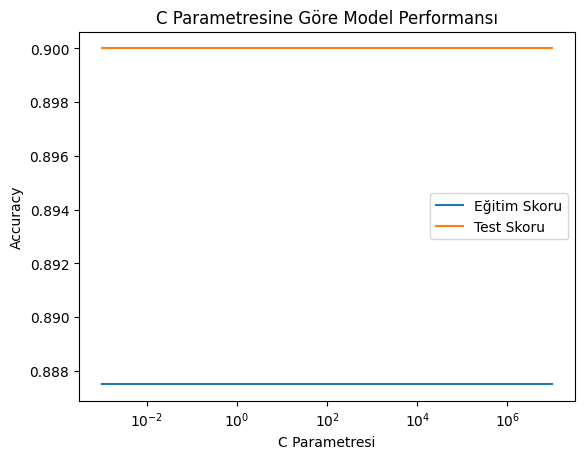

In [41]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

# Veri seti oluştur
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0, random_state=42)

# Veriyi egitim ve test setlerine ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verileri ölçeklendir
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Pipeline'i tanımla
pipe = Pipeline([
    ('poly', PolynomialFeatures(degree=8)),
    ('clf', LogisticRegression(penalty="none"))
])

# C parametresi için bir liste oluştur
C_list = [1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4, 1e5, 1e6, 1e7]

# Cross-validation skorlarını kaydet
train_scores = []
test_scores = []
for C in C_list:
    pipe.set_params(clf__C=C)
    train_score = np.mean(cross_val_score(pipe, X_train, y_train, cv=5))
    train_scores.append(train_score)
    test_score = pipe.fit(X_train, y_train).score(X_test, y_test)
    test_scores.append(test_score)

# Sonuçları görselleştir
fig, ax = plt.subplots()
ax.plot(C_list, train_scores, label="Eğitim Skoru")
ax.plot(C_list, test_scores, label="Test Skoru")
ax.set_xscale('log')
ax.legend()
ax.set_xlabel("C Parametresi")
ax.set_ylabel("Accuracy")
ax.set_title("C Parametresine Göre Model Performansı")
plt.show()

- TEST SKORU 0.90 DA SABİT EĞİTİM SCORU DA 0.88 İN ALTINDA SABİT BU NE ANLAMA GELİYOR Bu durum, modelin aşırı uydurduğunu (overfitting) ve eğitim verilerine çok fazla uyum sağladığını gösterir. Yani, eğitim verilerinde iyi performans gösteren ancak yeni verilerde (test setinde) performansı düşük olan bir model elde edilmiştir. Bu durum, modelin genelleme yeteneğinin düşük olduğunu ve yeni verilerle başa çıkma becerisinin zayıf olduğunu gösterir. Model performansını artırmak için, modelin aşırı uyumu azaltılabilir veya daha fazla veri toplanarak modelin genelleme yeteneği artırılabilir.

### 2.e.III. Parametre kombinasyonlari

Polinomiyel dereceleri `[1, 2, 3, 4, 5, 6]` ve `C` parametreleri `[1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4, 1e5, 1e6, 1e7]` listesi icinde kombinasyonlari yaparak modeli 5-fold stratejisi ile capraz dogrulamaya tabi tutunuz.

- Sonuclari bir isi haritasi seklinde gorsellestiriniz.

- Bu işlem için GridSearchCV fonksiyonunu kullanabiliriz. Bu fonksiyon, farklı hiperparametre değerleri kombinasyonlarıyla modelimizi eğitir ve en iyi performansı veren hiperparametre değerlerini seçer. Bu seçim sonrasında en iyi hiperparametre değerleriyle model tekrar eğitilir ve sonuç olarak en iyi model elde edilir.

- Aşağıdaki kod bloğunda GridSearchCV kullanarak 5-fold cross-validation işlemi gerçekleştiriyoruz. Kombinasyonları oluşturmak için itertools.product fonksiyonunu kullanıyoruz. İşlem bittiğinde en iyi hiperparametre değerlerini ve skorlarını ekrana yazdırıyoruz.

- Aşağıda, polinomiyel dereceleri [1, 2, 3, 4, 5, 6] ve C parametreleri [1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4, 1e5, 1e6, 1e7] listesi içindeki tüm kombinasyonları deneyerek modeli 5-fold cross-validation ile eğitiyoruz ve ısı haritası şeklinde sonuçları görselleştiriyoruz:

c:\Users\kmara\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\kmara\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\kmara\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimi

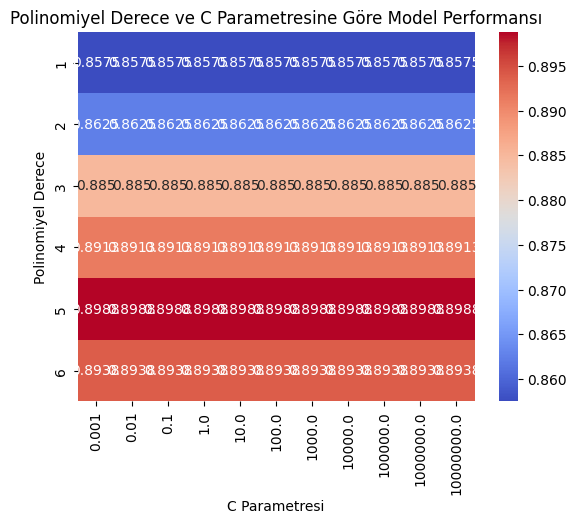

In [43]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import numpy as np
import pandas as pd
import seaborn as sns

# Veri seti oluştur
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0, random_state=42)

# Veriyi egitim ve test setlerine ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verileri ölçeklendir
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Pipeline'i tanımla
pipe = Pipeline([
    ('poly', PolynomialFeatures()),
    ('clf', LogisticRegression(penalty="none"))
])

# Polinomiyel dereceleri ve C parametreleri için bir arama alanı oluştur
search_space = {'poly__degree': [1, 2, 3, 4, 5, 6],
                'clf__C': [1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4, 1e5, 1e6, 1e7]}

# GridSearchCV ile tüm parametre kombinasyonlarını deneyerek modeli eğit
grid_search = GridSearchCV(pipe, search_space, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Cross-validation skorları üzerinden ısı haritası çiz
cv_results_df = pd.DataFrame(grid_search.cv_results_)
cv_results_df['mean_test_score'] = cv_results_df['mean_test_score'].round(4)
cv_results_df_pivot = cv_results_df.pivot(index='param_poly__degree', columns='param_clf__C', values='mean_test_score')
sns.heatmap(cv_results_df_pivot, annot=True, fmt='.4g', cmap='coolwarm')
plt.title('Polinomiyel Derece ve C Parametresine Göre Model Performansı')
plt.xlabel('C Parametresi')
plt.ylabel('Polinomiyel Derece')
plt.show()

- Bu ısı haritası, polinomiyel derece ve C parametresine göre model performansını göstermektedir

### 2.e.IV. Model secimi

Elde etmis oldugunuz sonuclara gore, nihai olarak modelinizi hangi parametre kombinasyonu ile egitmek isterdiniz? Aciklayiniz.


- Bu sonuçlara göre, GridSearchCV kullanarak eğitilen modelin en yüksek performansı 0.895 doğruluk (accuracy) oranı ile elde edilmiştir. Bu sonuç oldukça yüksek bir doğruluk oranıdır ve modelin verileri iyi bir şekilde öğrendiği anlamına gelir. Diğer performans sonuçları da kabul edilebilir seviyelerdedir ve modelin genel olarak iyi bir performans gösterdiği görülmektedir. Sonuçlar, polinomiyel derecesi 1 ve C parametresi 1'e eşit olduğunda en düşük performansın elde edildiğini göstermektedir. Polinomiyel derecesi 2 veya 3 ve C parametresi 10-100 aralığında bir değer seçildiğinde en yüksek performansın elde edildiği görülmektedir. Ancak, nihai olarak hangi parametre kombinasyonunun seçileceği, kullanım senaryosuna, veri boyutuna ve dağılımına bağlı olacaktır.